In [36]:
import numpy as np      # For arrays
import pandas as pd     # Dataframes and manipulation
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# read csv file as Dataframe
sales = pd.read_csv("c:\For Internships & Job Applications\personal project\Sales Retail\supermarket sales\supermarket_sales - Sheet1.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [37]:
print(sales.shape)
print(sales.info())

(1000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin p

In [38]:
# Preparing training and testing datasets
# 70% train 30% test
X = sales.drop(columns=["Total"])
y = sales["Total"]

seed = np.random.randint(0, 1000)
print(seed)

402


In [39]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape

((700, 16), (300, 16))

In [40]:
X_train.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
726,442-44-6497,C,Naypyitaw,Member,Male,Home and lifestyle,55.57,3,8.3355,1/8/2019,11:42,Credit card,166.71,4.761905,8.3355,5.9
397,760-54-1821,B,Mandalay,Normal,Male,Home and lifestyle,13.59,9,6.1155,3/15/2019,10:26,Cash,122.31,4.761905,6.1155,5.8
128,663-86-9076,C,Naypyitaw,Member,Female,Food and beverages,68.54,8,27.4160,1/8/2019,15:57,Ewallet,548.32,4.761905,27.4160,8.5
207,263-87-5680,C,Naypyitaw,Member,Female,Home and lifestyle,28.53,10,14.2650,3/18/2019,17:38,Ewallet,285.30,4.761905,14.2650,7.8
741,451-73-2711,C,Naypyitaw,Normal,Male,Food and beverages,84.83,1,4.2415,1/14/2019,15:20,Ewallet,84.83,4.761905,4.2415,8.8


In [41]:
y_train.head()

726    175.0455
397    128.4255
128    575.7360
207    299.5650
741     89.0715
Name: Total, dtype: float64

In [42]:
X_train_copy = X_train.copy()
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 726 to 389
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               700 non-null    object 
 1   Branch                   700 non-null    object 
 2   City                     700 non-null    object 
 3   Customer type            700 non-null    object 
 4   Gender                   700 non-null    object 
 5   Product line             700 non-null    object 
 6   Unit price               700 non-null    float64
 7   Quantity                 700 non-null    int64  
 8   Tax 5%                   700 non-null    float64
 9   Date                     700 non-null    object 
 10  Time                     700 non-null    object 
 11  Payment                  700 non-null    object 
 12  cogs                     700 non-null    float64
 13  gross margin percentage  700 non-null    float64
 14  gross income             700 

In [43]:
X_train_copy.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [44]:
num_data = X_train_copy.select_dtypes(exclude=["object"])
num_data.head()

,Unit price,Quantity,Tax 5%,cogs,gross margin percentage,gross income,Rating
726,55.57,3,8.3355,166.71,4.761905,8.3355,5.9
397,13.59,9,6.1155,122.31,4.761905,6.1155,5.8
128,68.54,8,27.4160,548.32,4.761905,27.4160,8.5
207,28.53,10,14.2650,285.30,4.761905,14.2650,7.8
741,84.83,1,4.2415,84.83,4.761905,4.2415,8.8


In [45]:
num_data.describe()

,Unit price,Quantity,Tax 5%,cogs,gross margin percentage,gross income,Rating
count,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000
mean,55.365071,5.551429,15.404254,308.085071,4.761905e+00,15.404254,6.936000
std,26.751348,2.924209,11.812191,236.243830,5.244000e-14,11.812191,1.704414
min,10.080000,1.000000,0.508500,10.170000,4.761905e+00,0.508500,4.000000
25%,31.967500,3.000000,5.784500,115.690000,4.761905e+00,5.784500,5.500000
50%,54.480000,6.000000,12.236250,244.725000,4.761905e+00,12.236250,6.900000
75%,78.327500,8.000000,22.092000,441.840000,4.761905e+00,22.092000,8.400000
max,99.960000,10.000000,49.650000,993.000000,4.761905e+00,49.650000,10.000000


<Axes: ylabel='Unit price'>

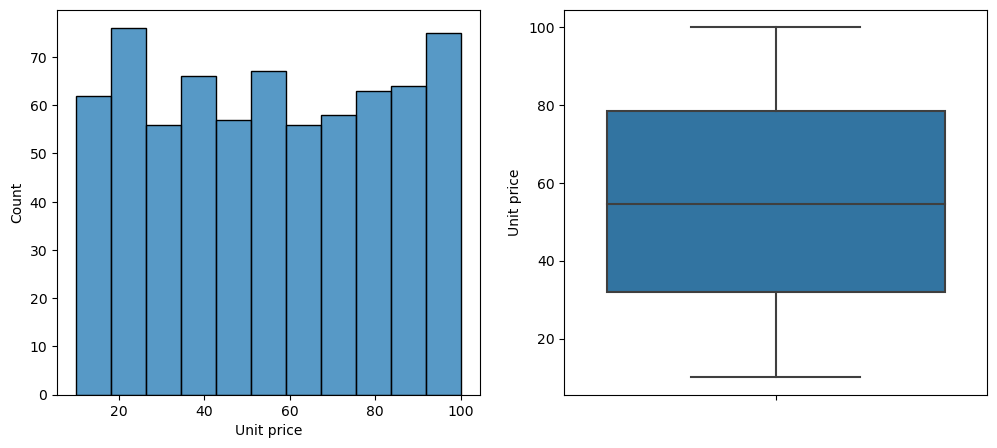

In [46]:
# Visualize data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=X_train_copy, x="Unit price", ax=ax[0])
sns.boxplot(data=X_train_copy, y="Unit price", ax=ax[1])

In [47]:
def visualize_numeric_feature(dataframe, col_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data=dataframe, x=col_name, ax=ax[0])
    sns.boxplot(data=dataframe, y=col_name, ax=ax[1])

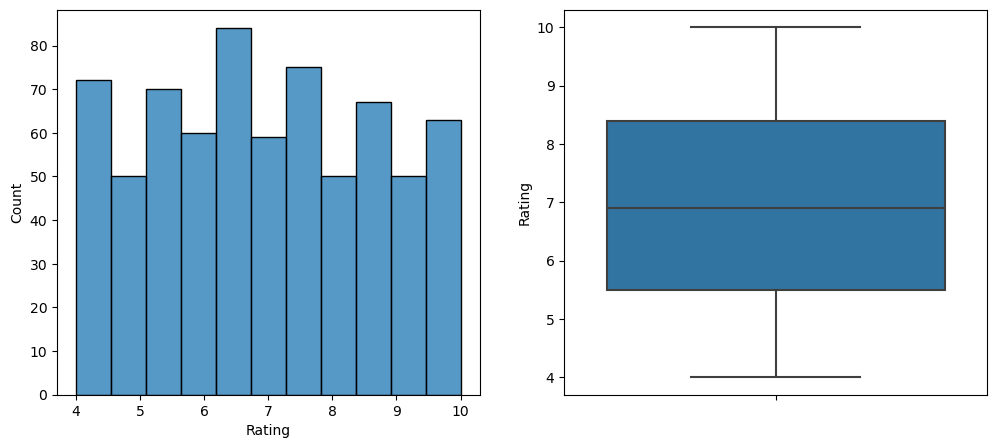

In [48]:
visualize_numeric_feature(X_train_copy, 'Rating')

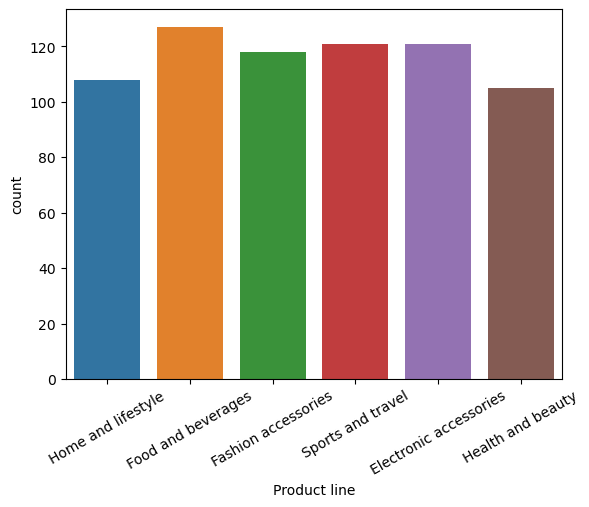

In [49]:
sns.countplot(data=X_train_copy, x="Product line")
plt.xticks(rotation=30);

In [50]:
cat_feature = X_train_copy.select_dtypes(include=["object"])
cat_feature.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
726,442-44-6497,C,Naypyitaw,Member,Male,Home and lifestyle,1/8/2019,11:42,Credit card
397,760-54-1821,B,Mandalay,Normal,Male,Home and lifestyle,3/15/2019,10:26,Cash
128,663-86-9076,C,Naypyitaw,Member,Female,Food and beverages,1/8/2019,15:57,Ewallet
207,263-87-5680,C,Naypyitaw,Member,Female,Home and lifestyle,3/18/2019,17:38,Ewallet
741,451-73-2711,C,Naypyitaw,Normal,Male,Food and beverages,1/14/2019,15:20,Ewallet


In [51]:
cat_feature.describe()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,700,700,700,700,700,700,700,700,700
unique,700,3,3,2,2,6,89,420,3
top,442-44-6497,C,Naypyitaw,Normal,Male,Food and beverages,2/15/2019,17:38,Ewallet
freq,1,236,236,360,352,127,15,5,242


In [52]:
cat_feature.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Date             0
Time             0
Payment          0
dtype: int64

In [53]:
pd.unique(cat_feature["Product line"])

array(['Home and lifestyle', 'Food and beverages', 'Fashion accessories',
       'Sports and travel', 'Electronic accessories', 'Health and beauty'],
      dtype=object)

In [54]:
X_train_copy['Product line'] = X_train_copy['Product line'].map({
    'Electronic accessories': 'EA',
    'Health and beauty': 'HAB',
    'Fashion accessories': 'FA',
    'Sports and travel': 'SAT',
    'Food and beverages': 'FAB',
    'Home and lifestyle': 'HAL'
})

pd.unique(X_train_copy['Product line'])

array(['HAL', 'FAB', 'FA', 'SAT', 'EA', 'HAB'], dtype=object)